# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **04- Color processing (B&W, Saturation, White Balance)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
img = cv2.imread("flower.jpg")

Wall time: 13 ms


## 1. Converting image into GrayScale

### 1.1 using cv2.cvtColor() method

In [3]:
%%time
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Wall time: 991 µs


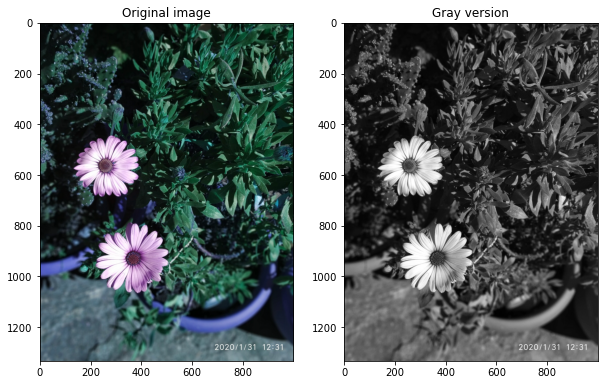

In [4]:
# plot it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(img)
ax1.title.set_text("Original image")
ax2.imshow(gray,cmap='gray')
ax2.title.set_text("Gray version")

### 1.2 reading image directly into gray scale

In [5]:
%%time
gray = cv2.imread("flower.jpg", 0)

Wall time: 7.01 ms


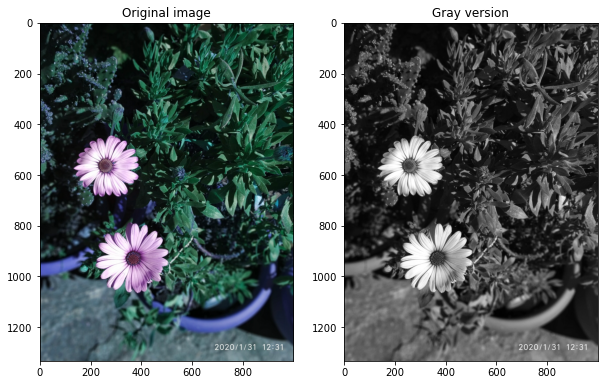

In [6]:
# plot it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(img)
ax1.title.set_text("Original image")
ax2.imshow(gray,cmap='gray')
ax2.title.set_text("Gray version")

## 2. converting image into Black & White

In [7]:
img = cv2.imread("flower.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
%%time
(thresh, bwimg) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY )

Wall time: 0 ns


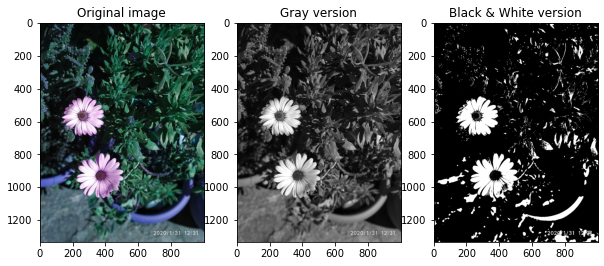

In [9]:
# plot it
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))
ax1.imshow(img)
ax1.title.set_text("Original image")
ax2.imshow(gray,cmap='gray')
ax2.title.set_text("Gray version")
ax3.imshow(bwimg,cmap='gray')
ax3.title.set_text("Black & White version")

## 3. Saturation

In [10]:
img = cv2.imread("dream1.jpg")
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

b,g,r = cv2.split(img)
h,s,v = cv2.split(hsv)
print("original shape", img.shape)
print("b,g,r shapes", b.shape, g.shape, r.shape)
print("h,s,v shapes", h.shape, s.shape, v.shape)

# define range of blue color in HSV
lower = np.array([110,50,50])
upper = np.array([130,255,255])

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower, upper)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

original shape (1333, 1000, 3)
b,g,r shapes (1333, 1000) (1333, 1000) (1333, 1000)
h,s,v shapes (1333, 1000) (1333, 1000) (1333, 1000)


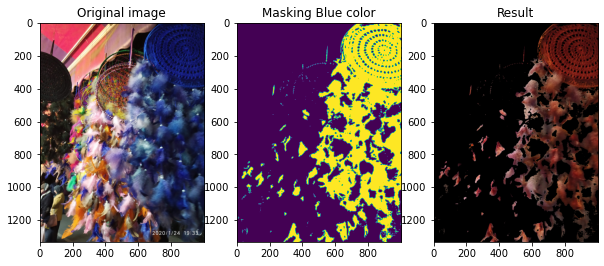

In [11]:
# plot it
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))
ax1.imshow(orig)
ax1.title.set_text("Original image")
ax2.imshow(mask)
ax2.title.set_text("Masking Blue color")
ax3.imshow(res)
ax3.title.set_text("Result")

## 4. Adjusting White Balance

In [12]:
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

In [13]:
img = cv2.imread("fruit1.jpg")
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new = white_balance(img)
new = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)

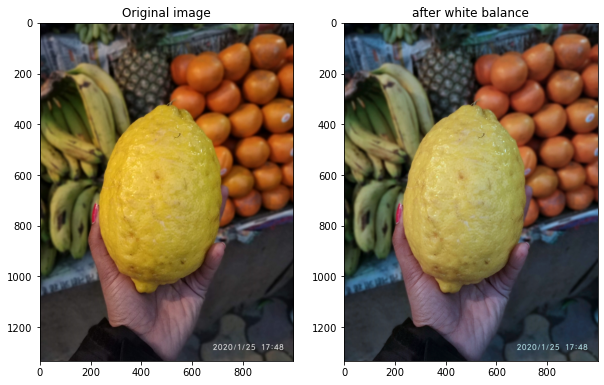

In [14]:
# plot it
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(orig)
ax1.title.set_text("Original image")
ax2.imshow(new)
ax2.title.set_text("after white balance")


## references:
- https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html
- https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
- https://realpython.com/python-opencv-color-spaces/
- https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption/46391574
- https://pippin.gimp.org/image-processing/chapter-automaticadjustments.html